<a href="https://colab.research.google.com/github/zenintelligence/shinjimei/blob/master/fashion_MNIST_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importieren der Libraries


In [0]:
!pip install deeplearning2020
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from deeplearning2020 import helpers

# Laden des Datensatzes

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

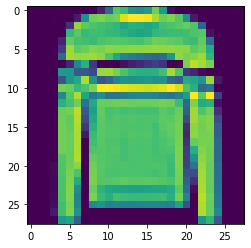

In [0]:
plt.imshow(train_images[5])

In [0]:
print(train_labels[5])

2


In [0]:
 normalized_train_images= train_images / 255


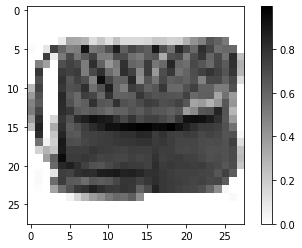

In [0]:
plt.imshow(normalized_train_images[30003], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

# Label als Vektor mit 10 Komponeten

In [0]:
total_classes = 10
train_vec_labels = keras.utils.to_categorical(train_labels, total_classes)
test_vec_labels = keras.utils.to_categorical(test_labels, total_classes)

In [0]:
print(f"Label: {train_vec_labels[30003]}")

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


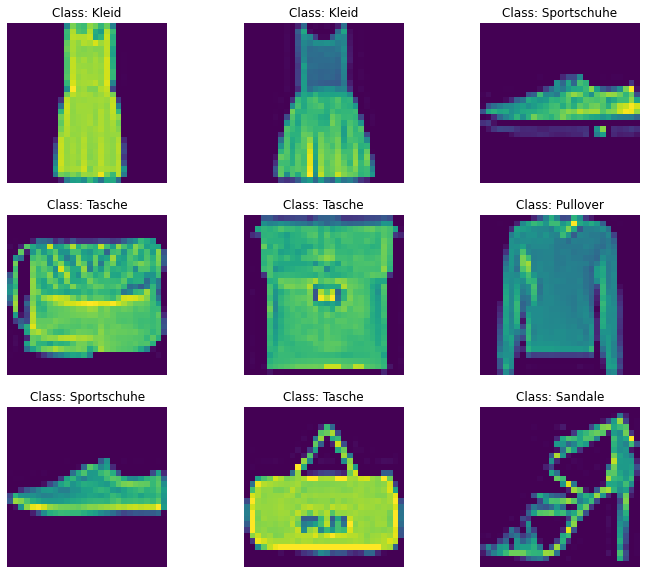

In [0]:
klassen=np.array(["T-shirt","Hose","Pullover","Kleid", "Mantel","Sandale","Hemd","Sportschuhe","Tasche","Stiefel"])
helpers.plot_images_with_labels(normalized_train_images[30000:30020],labels=train_labels[30000:30020],class_names=klassen)

In [0]:
model = keras.Sequential([          #Netze Entwurf
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='tanh'),  
    keras.layers.Dense(10, activation='tanh')
])
#Compilieren
#sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(
    optimizer='sgd',
    loss='mean_squared_error',
    metrics=['accuracy'])
#Trainieren
model.fit(normalized_train_images, train_vec_labels, epochs=15, verbose=True)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0741 - acc: 0.6463
Epoch 2/15
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0514 - acc: 0.7636
Epoch 3/15
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0460 - acc: 0.7857
Epoch 4/15
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0431 - acc: 0.7959
Epoch 5/15
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0411 - acc: 0.8014
Epoch 6/15
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0397 - acc: 0.8064
Epoch 7/15
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0386 - acc: 0.8094
Epoch 8/15
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0376 - acc: 0.8125
Epoch 9/15
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0369 - acc: 0.8147
Epoch 10/15
60000/60000 [==============================] - 

# Testen des Netzes

In [0]:
normalized_test_images= test_images / 255
eval_loss, eval_accuracy = model.evaluate(normalized_test_images, test_vec_labels, verbose=False)
print("Model accuracy: %.2f" % eval_accuracy)

Model accuracy: 0.81


# Ausgabe

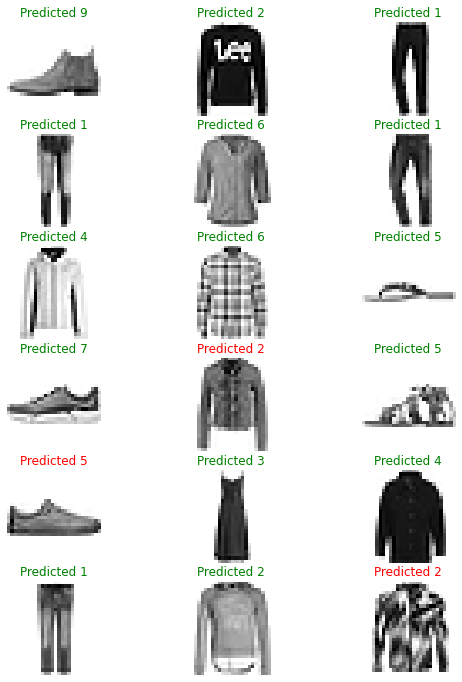

In [0]:
helpers.plot_predictions(model, normalized_test_images[:20], labels=test_vec_labels[:20])

In [0]:
from deeplearning2020 import Submission
Submission('e417cbb29caf157030e88dd94020f698', '2', model).submit()

Using TensorFlow backend.


Assignment 2 erfolgreich abgegeben!
Dein Model hat eine Accuracy von 83.0% auf unseren Validierungsdaten.
Du erhältst 100.0% der Punkte auf dieses Assignment.
Falls du bereits eine Abgabe mit höherer Bewertung abgegeben hast, wird automatisch das bessere Ergebnis gewählt.
